<a href="https://colab.research.google.com/github/abdulatifkhan/analysis-of-advertising-dependence-on-sales/blob/main/scikit_learn_simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reklamalarning sotuvga ta'sirini Linear Regression yordamida prognoz qilish

Kerakli kutubxonalarni chaqirib olish

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

O'rganiladigan datasetni chaqirib olish

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Dataframe ma'lumotlarini o'rganish

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Dataframening hajmini

In [4]:
df.shape

(200, 4)

Dataframendagi ustunlarning korelatsiyasi

In [5]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Yuqoridagi korelatsiyadan ko'proq TVdagi reklamalar sotuvga ta'sir ko'rsatayotganini ko'rish mumkin. Shu sababli uni ajratib olish kerak bo'ladi.

In [12]:
X = df['TV'].to_numpy()
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

Sotuv qismi ham alohida ajratib olinadi.

In [14]:
y = df['Sales'].to_numpy()
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

TV va Sales ustunlarining bog'liqlini chizmada namoyish qilish

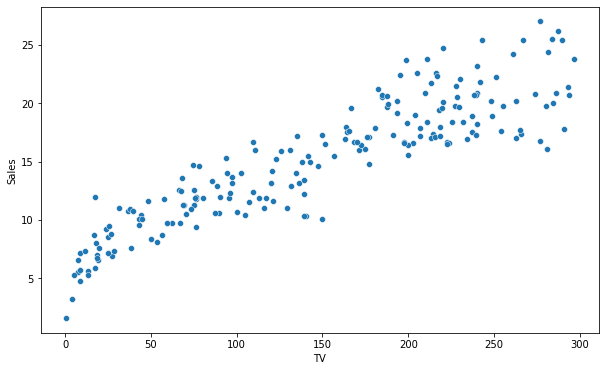

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

TV va Sales ustunlarining bog'liqlini liniya orqali o'rganish

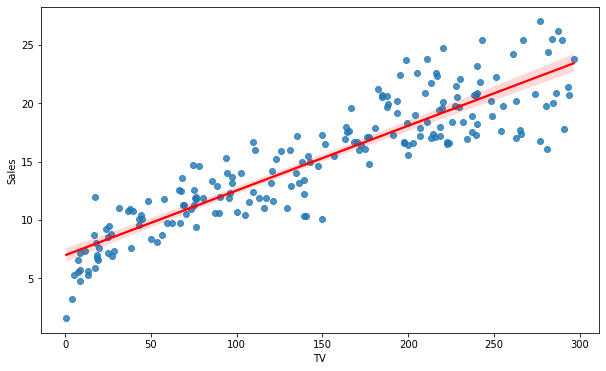

In [7]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

Ajratib olingan TV va Sales ustunlarining o'rtacha qiymatini topish

In [15]:
Xmean = np.mean(X)
ymean = np.mean(y)

Prognoz qilishda foydalaniladigan theta1 va theta0ni formula orqali topish

In [16]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(theta1)

0.05546477046955879


In [17]:
theta0 = ymean - theta1*Xmean
theta0

6.974821488229903

Random orqali TV va Sales qismlarini ajratib olish

In [18]:
x_test = df.sample(10, random_state=42)['TV'].to_numpy()
print(x_test)

y_test = df.sample(10, random_state=42)['Sales'].to_numpy()
print(y_test)

[163.3 195.4 292.9  11.7 220.3  75.1 216.8  50.  222.4 175.1]
[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1]


Random olingan TV qiymat orqali prognoz qilish

In [19]:
y_predict = theta0 + theta1*x_test
y_predict

array([16.03221851, 17.81263764, 23.22045276,  7.6237593 , 19.19371042,
       11.14022575, 18.99958373,  9.74806001, 19.31018644, 16.6867028 ])

Haqiqiy qiymatni prognoz qiymat bilan tekshirib, oradagi xatolikni chiqarish

In [20]:
# MAE

MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(MAE)

2.261078526821641


In [21]:
# RMSE

RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(RMSE)

2.8038786286907422


In [22]:
df.shape

(200, 4)

Dataframeni train va test setlarga ajratish

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

Linear Regressionni chaqirib olib, theta1 va theta0larni topish

In [24]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Model train (tarbiya) qilinadi
LR_model.fit(x_train, y_train)

# theta1 va theta0 koeefisentlari ajratib olinadi
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(theta1)
print(theta0)

0.05513263076693964
7.044916461655207


TV reklamasining sotuvga bog'liqligini vizual chiqarish

Text(0, 0.5, 'Sales')

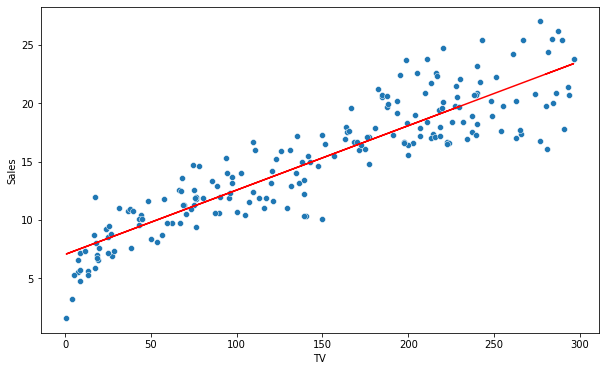

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [29]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

Prognoz qilib ko'rish

In [30]:
y_predict = LR_model.predict(x_test)

Oradagi o'rtacha xatoliklarni aniqlash

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(MAE)
print(RMSE)

2.037955356968121
2.5103822386472214


Prognoz qilingan qiymat

In [74]:
df_predict = pd.DataFrame(y_predict, index=np.arange(1, 21))
df_predict.columns =['Bashorat']
df_predict

,Bashorat
1,16.048075
2,17.817833
3,23.193264
4,7.689968
5,19.190635
6,11.185377
7,18.997671
8,9.801548
9,19.306414
10,16.698640


Asl qiymat

In [75]:
df_test = pd.DataFrame(y_test, index=np.arange(1, 21))
df_test.columns =['Asl qiymat']
df_test

,Asl qiymat
1,16.9
2,22.4
3,21.4
4,7.3
5,24.7
6,12.6
7,22.3
8,8.4
9,16.5
10,16.1
